In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datos/train.csv', index_col = 'ID')
#información general del documento
print(df.info())

#información de los valores unicos de cada columna
for i in df.columns:
    print(i + ': ' + str(len(df[i].unique())))

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   PERIODO                         692500 non-null  int64 
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 4   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 5   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 6   FAMI_TIENEINTERNET              665871 non-null  object
 7   FAMI_EDUCACIONPADRE             669322 non-null  object
 8   FAMI_EDUCACIONMADRE             668836 non-null  object
 9   ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 10  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(1), object(10)
memory usage: 63.4+ MB
None
PERIODO: 9
ESTU_PRGM_ACADEMICO: 948
EST

In [2]:
print('Rendimiento global')
print(df['RENDIMIENTO_GLOBAL'].unique())
tipo_rendimientos = ['alto', 'medio-alto', 'medio-bajo', 'bajo']

Rendimiento global
['medio-alto' 'bajo' 'alto' 'medio-bajo']


In [4]:
#Celda para ver valores unicos de cada columna
print(df.columns[2])
print(df[df.columns[2]].unique())
print('porcentaje de valores nulos ' + str(df.FAMI_TIENEINTERNET.isna().sum()*100/df.shape[0]))

ESTU_PRGM_DEPARTAMENTO
['BOGOTÁ' 'ATLANTICO' 'SANTANDER' 'ANTIOQUIA' 'HUILA' 'SUCRE' 'CAQUETA'
 'CUNDINAMARCA' 'BOLIVAR' 'TOLIMA' 'VALLE' 'QUINDIO' 'RISARALDA' 'CORDOBA'
 'META' 'LA GUAJIRA' 'BOYACA' 'NARIÑO' 'CAUCA' 'NORTE SANTANDER' 'CESAR'
 'PUTUMAYO' 'CALDAS' 'MAGDALENA' 'CHOCO' 'CASANARE' 'ARAUCA' 'GUAVIARE'
 'AMAZONAS' 'VAUPES' 'SAN ANDRES']
porcentaje de valores nulos 3.8453429602888085


In [4]:
for i in df['PERIODO'].unique():
    print(str(i) + ': ' + str(df[df['PERIODO'] == i].shape[0]*100/df.shape[0]))

20212: 24.75263537906137
20203: 24.814151624548735
20195: 26.11884476534296
20183: 23.80043321299639
20194: 0.21256317689530685
20213: 0.17010830324909748
20184: 0.03667870036101083
20202: 0.07075812274368232
20196: 0.023826714801444042


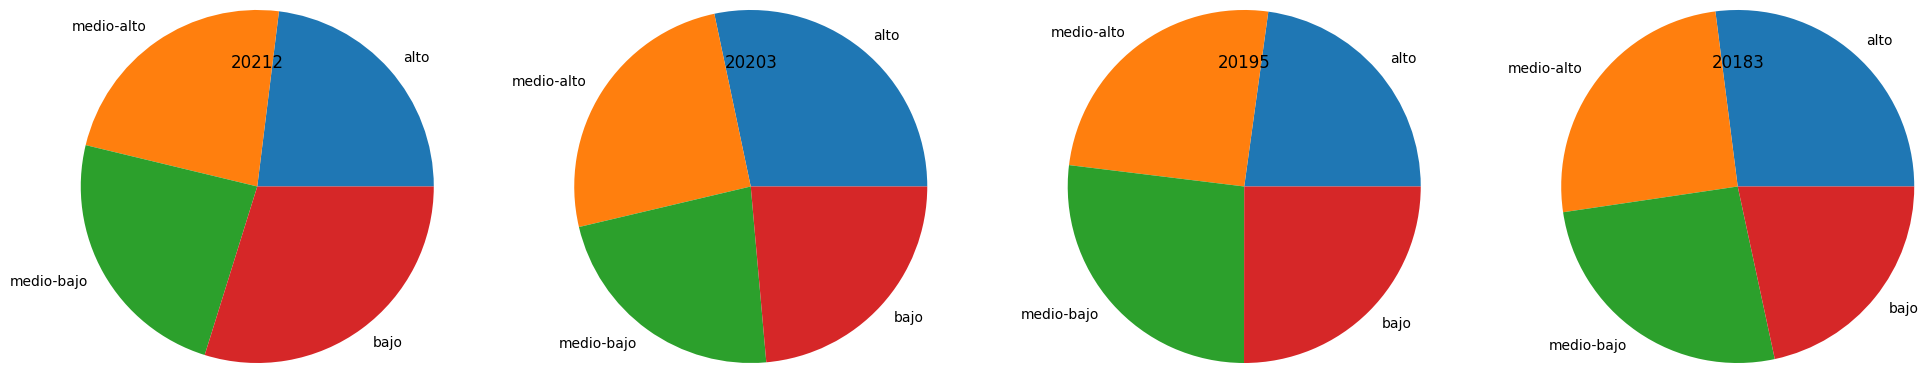

In [5]:
periodos_academicos = [20212, 20203, 20195, 20183]
numero_rendimiento = [0, 0, 0, 0] # alto, medio-alto, medio-bajo, bajo

plt.figure(figsize=(20, 5))

for i in range(len(periodos_academicos)):
    for j in range(len(tipo_rendimientos)):
        numero_rendimiento[j] = df[(df['PERIODO'] == periodos_academicos[i]) & (df['RENDIMIENTO_GLOBAL'] == tipo_rendimientos[j])].shape[0]
    
    plt.subplot(1, 4, i+1)
    plt.pie(numero_rendimiento, radius=2, labels=tipo_rendimientos)
    plt.title(str(periodos_academicos[i]))

plt.tight_layout()
plt.show()

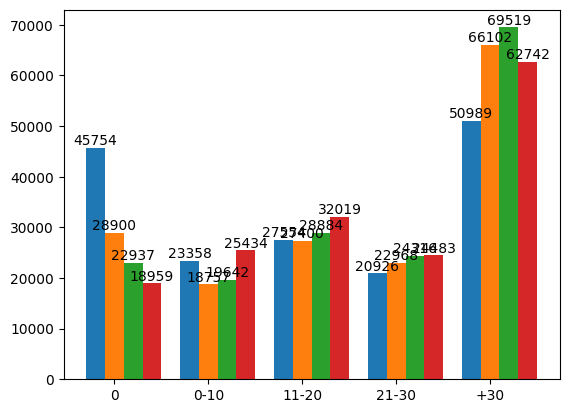

In [6]:
# cuantos estudiantes hay trabajando y cual es su rendimiento
tr = {}
tm = ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas']
for i in tipo_rendimientos:
        tr[i] = [df[(df['RENDIMIENTO_GLOBAL'] == i) & (df['ESTU_HORASSEMANATRABAJA'] == j)].shape[0] for j in tm]
x = x = np.arange(len(tm))
width = 0.2
multiplier = 0

fig, ax = plt.subplots()
fig.set_size_inches(9,5)

for clave, valor in tr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valor, width)
    ax.bar_label(rects)
    multiplier += 1

ax.set_xticks(x + width, ['0', '0-10', '11-20', '21-30', '+30'])
plt.show()

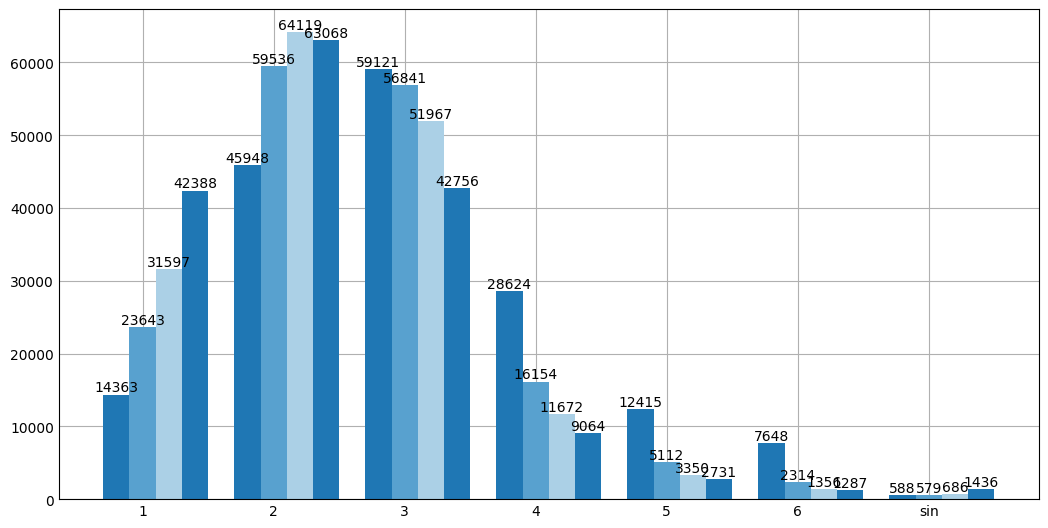

In [52]:
# cuantos estudiantes hay trabajando y cual es su rendimiento
tr = {}
tm = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato']
for i in tipo_rendimientos:
        tr[i] = [df[(df['RENDIMIENTO_GLOBAL'] == i) & (df['FAMI_ESTRATOVIVIENDA'] == j)].shape[0] for j in tm]
x = x = np.arange(len(tm))
width = 0.2
multiplier = 0

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
for clave, valor in tr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valor, width)
    ax.bar_label(rects)
    multiplier += 1

ax.set_xticks(x + width, ['1', '2', '3', '4', '5', '6', 'sin'])
plt.show()

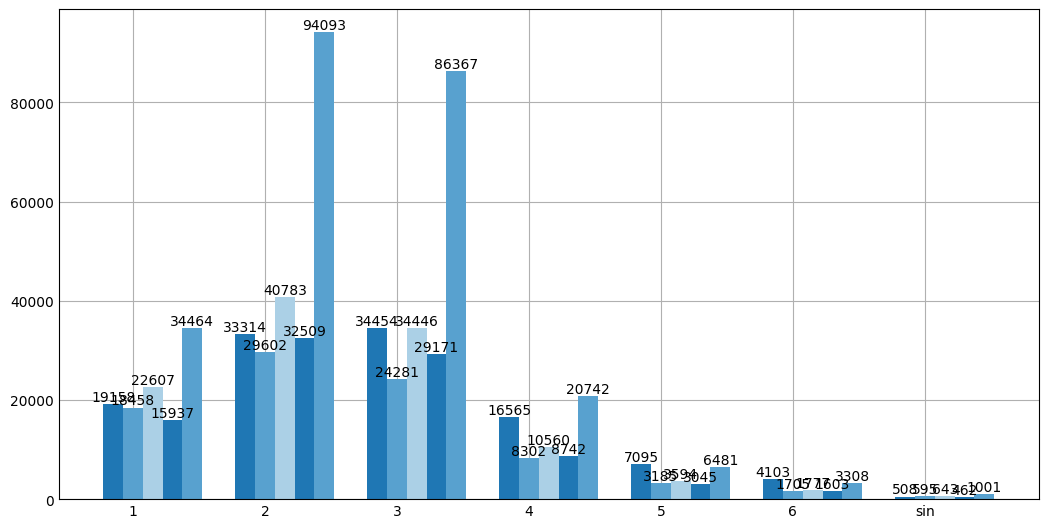

In [57]:
# cuantos estudiantes hay trabajando y cual es su rendimiento
tr = {}
tm = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato']
for i in ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas']:
        tr[i] = [df[(df['ESTU_HORASSEMANATRABAJA'] == i) & (df['FAMI_ESTRATOVIVIENDA'] == j)].shape[0] for j in tm]
x = x = np.arange(len(tm))
width = 0.15
multiplier = 0

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
for clave, valor in tr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valor, width)
    ax.bar_label(rects)
    multiplier += 1

ax.set_xticks(x + width, ['1', '2', '3', '4', '5', '6', 'sin'])
plt.show()

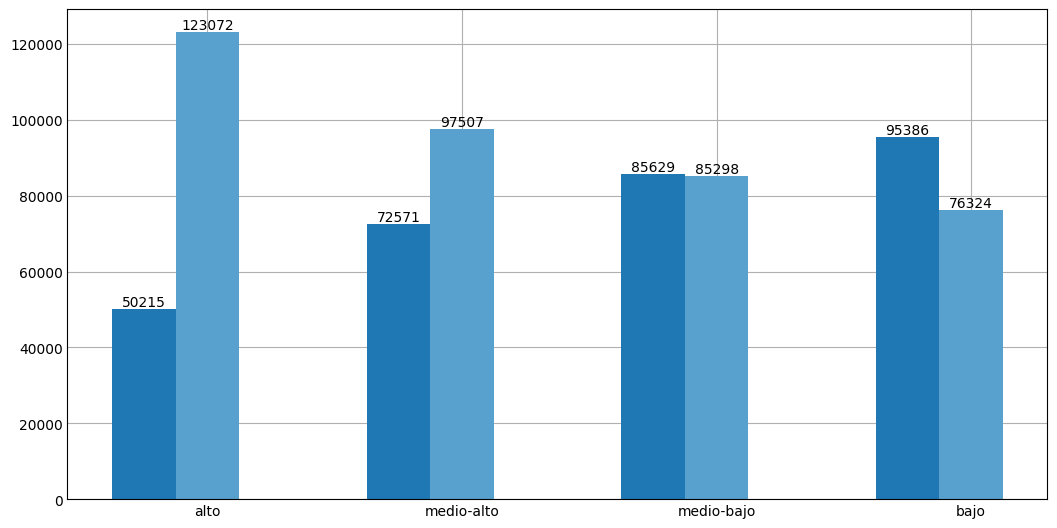

In [68]:
# cuantos estudiantes hay trabajando y cual es su rendimiento
tr = {}
for i in ['Si', 'No']:
        tr[i] = [df[(df['ESTU_PAGOMATRICULAPROPIO'] == i) & (df['RENDIMIENTO_GLOBAL'] == j)].shape[0] for j in tipo_rendimientos]
x = np.arange(4)
width = 0.25
multiplier = 0

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

for clave, valor in tr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valor, width)
    ax.bar_label(rects)
    multiplier += 1

ax.set_xticks(x + width, tipo_rendimientos)

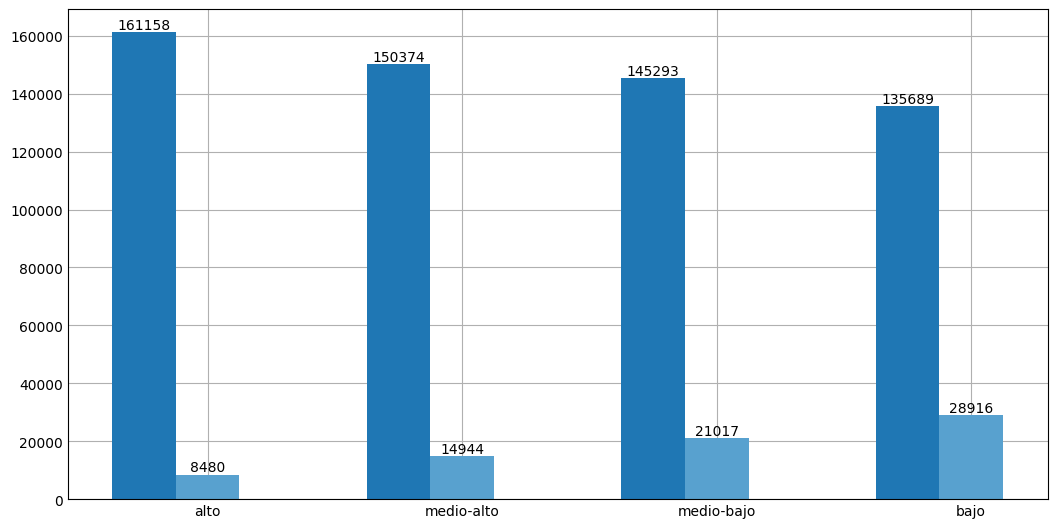

In [71]:
# cuantos estudiantes hay trabajando y cual es su rendimiento
tr = {}
for i in ['Si', 'No']:
        tr[i] = [df[(df['FAMI_TIENEINTERNET'] == i) & (df['RENDIMIENTO_GLOBAL'] == j)].shape[0] for j in tipo_rendimientos]
x = np.arange(4)
width = 0.25
multiplier = 0

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

for clave, valor in tr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valor, width)
    ax.bar_label(rects)
    multiplier += 1

ax.set_xticks(x + width, tipo_rendimientos)